In [1]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [7]:
# Asigno los dataset

# Testing
test_df = pd.read_csv('datasets/titanic-test.csv')
# Entrenamiento
train_df = pd.read_csv('datasets/titanic-train.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Vemos la información con respecto al dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


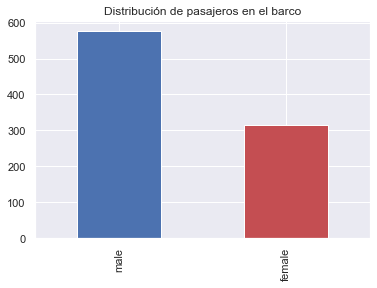

In [10]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribución de pasajeros en el barco')
plt.show()

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])

In [15]:
# Enfrentando el caso de valores nulos en el dataset. Recordar que a los árboles de decisión les afecta
# mucho los valores nulos.

# En este caso reemplazamos con la media
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

# En este caso lo llenamos con 'S'
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [21]:
# Eliminando datos que no nos importa
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)

# Etqiuetas que el algoritmo tiene que aprender
categorical_cols = [cname for cname in train_predictors.columns if
                       train_predictors[cname].nunique() < 10 and
                       train_predictors[cname].dtype == 'object']

In [22]:
categorical_cols

['Sex', 'Embarked']

In [27]:
# Valores de los cual el modelo aprende
numerical_cols = [cname for cname in train_predictors.columns if
                    train_predictors[cname].dtype in ['int64', 'float64']]

In [28]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [32]:
# Uno las columnas con la información correspondiente
my_cols = categorical_cols + numerical_cols

# Genero el dataset
train_predictors = train_predictors[my_cols]

In [33]:
# Visualizo el dataset
train_predictors

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.000000,1,0,7.2500
1,female,C,1,38.000000,1,0,71.2833
2,female,S,3,26.000000,0,0,7.9250
3,female,S,1,35.000000,1,0,53.1000
4,male,S,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,male,S,2,27.000000,0,0,13.0000
887,female,S,1,19.000000,0,0,30.0000
888,female,S,3,29.699118,1,2,23.4500
889,male,C,1,26.000000,0,0,30.0000


In [35]:
# Dummy de información para poder realizar una predicción con data más gorda. 
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [36]:
dummy_encoded_train_predictors

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [43]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [46]:
#
y_target = train_df['Survived'].values
X_features_one = dummy_encoded_train_predictors.values

In [49]:
# Divido mi dataset
X_train, X_validation, y_train, y_validation = train_test_split(X_features_one, y_target, test_size=.25, random_state=0)

In [62]:
# Genero mi árbol
tree_one = tree.DecisionTreeClassifier()

# Ajusto el modelo
tree_one = tree_one.fit(X_features_one, y_target)

In [63]:
tree_one_accuracy = round(tree_one.score(X_train, y_train), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))

Accuracy: 0.9805
